In [1]:
%matplotlib inline
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import *

In [2]:
train = pd.read_csv('kkbox-project/data/train_final_ordinal')
test = pd.read_csv('kkbox-project/data/test_final_ordinal')

In [3]:
X = train.drop(['msno','is_churn'], axis=1)
y = train['is_churn']

X_test = test.drop(['msno', 'is_churn'], axis=1)
y_test = test['is_churn']

In [4]:
categoric_list = ['payment_method_id', 'payment_plan_days', 'city', 'registered_via', 'is_auto_renew', 'is_cancel', 'gender', 'disc_user']

In [5]:
lgb_params = {
   'learning_rate': 0.005,
   'application': 'binary',
   'max_depth': 1,
   'num_leaves': 128,
   'verbosity': -1,
   'metric': 'binary_logloss',
   'feature_fraction': 0.6,
}


X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7)

d_train = lgb.Dataset(X, label = y)
d_valid = lgb.Dataset(X_validation, label = Y_validation)

watchlist = [d_train, d_valid]

model = lgb.train(lgb_params, train_set = d_train,  num_boost_round = 1000, valid_sets = watchlist, early_stopping_rounds = 100, verbose_eval = 100, categorical_feature=categoric_list)

C:\Users\user\Anaconda3\lib\site-packages\lightgbm\basic.py:1038: UserWarning: categorical_feature in Dataset is overrided. New categorical_feature is ['city', 'disc_user', 'gender', 'is_auto_renew', 'is_cancel', 'payment_method_id', 'payment_plan_days', 'registered_via']
  warnings.warn('categorical_feature in Dataset is overrided. New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\user\Anaconda3\lib\site-packages\lightgbm\basic.py:681: UserWarning: categorical_feature in param dict is overrided.
  warnings.warn('categorical_feature in param dict is overrided.')


Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.411775	valid_1's binary_logloss: 0.412158
[200]	training's binary_logloss: 0.277068	valid_1's binary_logloss: 0.277509
[300]	training's binary_logloss: 0.205161	valid_1's binary_logloss: 0.205576
[400]	training's binary_logloss: 0.165231	valid_1's binary_logloss: 0.165592
[500]	training's binary_logloss: 0.141793	valid_1's binary_logloss: 0.142096
[600]	training's binary_logloss: 0.127359	valid_1's binary_logloss: 0.127593
[700]	training's binary_logloss: 0.1178	valid_1's binary_logloss: 0.117965
[800]	training's binary_logloss: 0.111064	valid_1's binary_logloss: 0.111154
[900]	training's binary_logloss: 0.106032	valid_1's binary_logloss: 0.106076
[1000]	training's binary_logloss: 0.102029	valid_1's binary_logloss: 0.102069
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.102029	valid_1's binary_logloss: 0.102069


In [6]:
report_model = model.predict(X_validation)

In [8]:
ls = []
for i in report_model:
    if i >= 0.5:
        ls.append(1)
    else:
        ls.append(0)

In [9]:
print(classification_report(Y_validation, ls))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99    174985
          1       0.90      0.68      0.78     11731

avg / total       0.97      0.98      0.97    186716



In [10]:
result = model.predict(X_test)

In [11]:
importances = pd.DataFrame({"Feature":model.feature_name(), "Imps":model.feature_importance()}).sort_values(by="Imps", ascending=False)

impFeatures = list(importances[importances.Imps > 100].Feature)
importances

,Feature,Imps
5,membership_expire_date,390
6,is_cancel,322
3,is_auto_renew,111
4,transaction_date,93
1,payment_plan_days,42
2,actual_amount_paid,22
0,payment_method_id,20
13,age,0
18,pro_100,0
17,pro_985,0


In [12]:
result_df = pd.DataFrame(columns=['msno', 'is_churn'])

result_df['msno'] = test['msno']

result_df['is_churn'] = result

result_df

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0.027815
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0.027815
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0.027815
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0.027815
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0.030331
5,nu1jZ/flvSaXRg0U9Es+xmo2KlAXq/q+mhcWFStwm9w=,0.063259
6,biDTtgK83fEWXJDaxzD1eh22dion/h3odeIbS7qJMmY=,0.027815
7,k/8uwi/iM9LZmRAIWXLqpZY6ENomXAscwsQsh6PxcTw=,0.027815
8,18rQ/746SjA6nBx325UsyhfsDhu4tK01FXFxHWZjw20=,0.030022
9,2V13OCoWx6vqKr/ZzNmKFrmnC2FtR4SWMz5C5Hi02PY=,0.030022


In [ ]:
result_df.to_csv('lightgbm_best_model', index=False)

# 736480 = 2017.5.31

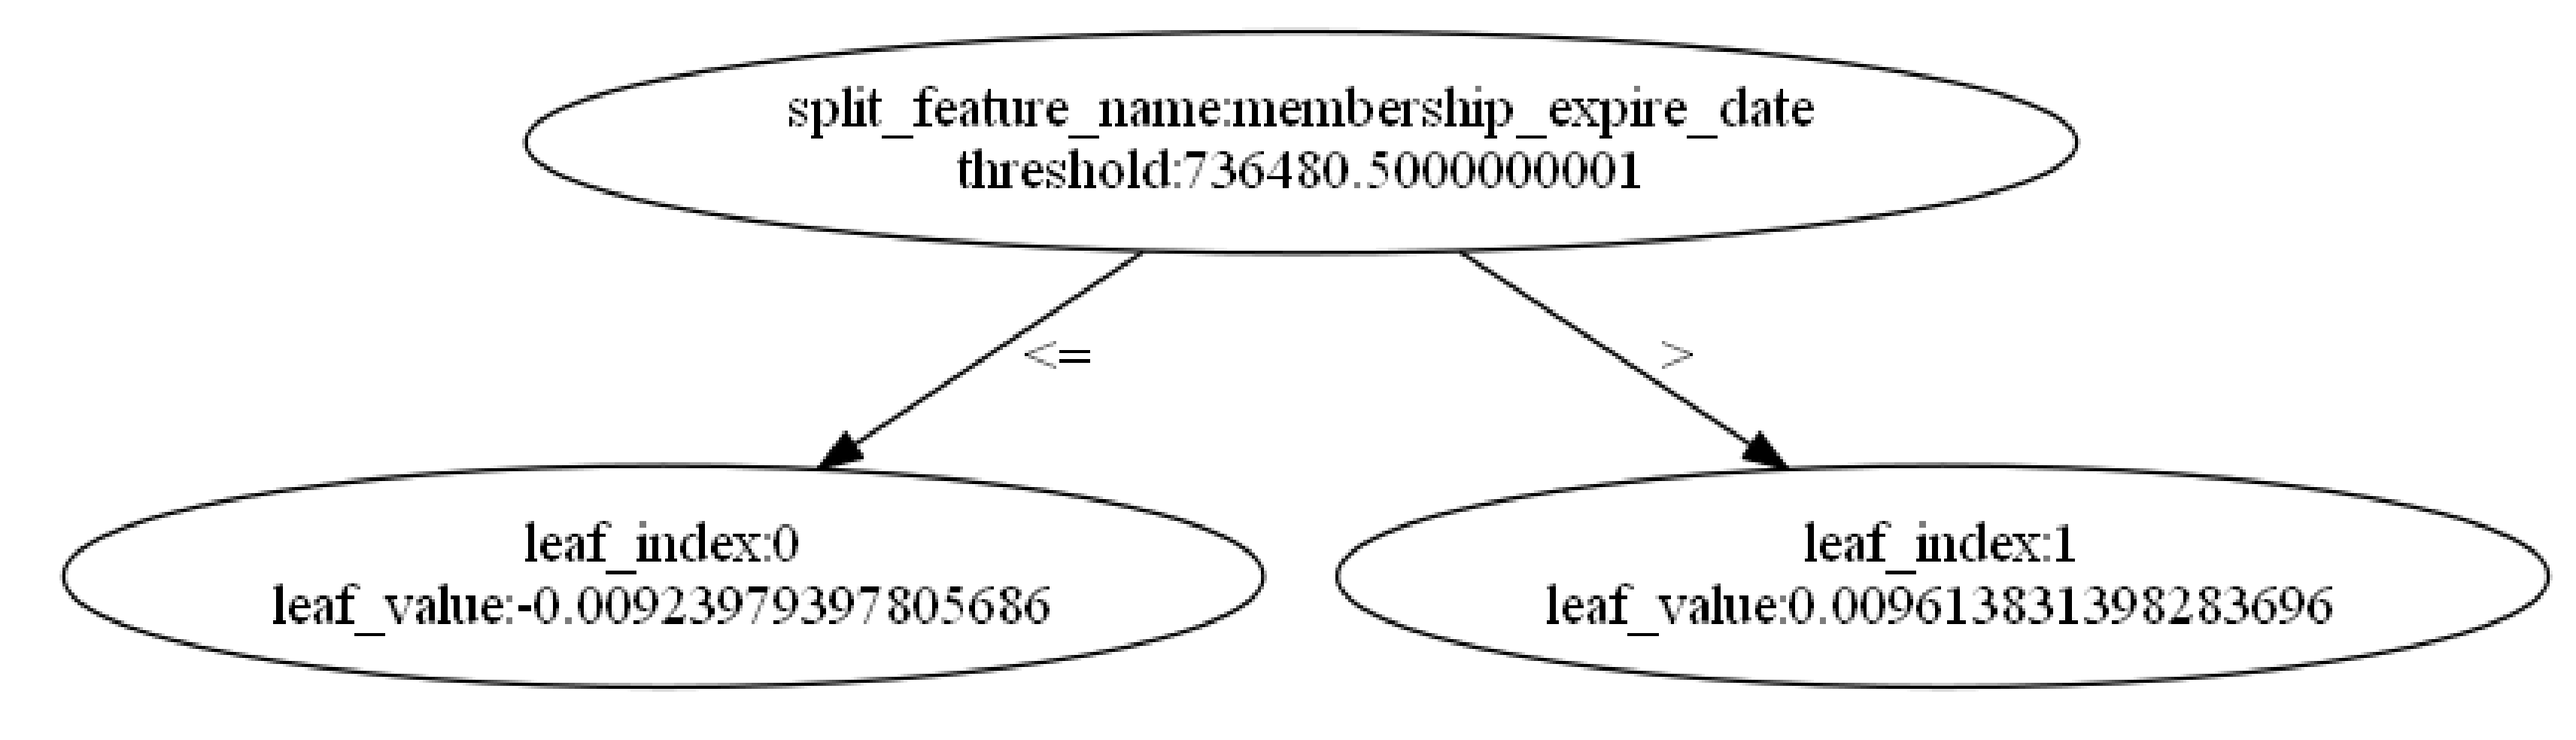

In [14]:
import lightgbm.plotting as lgbp

lgbp.plot_tree(model, figsize=(30,30))